In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.coordinates
from scipy.optimize import curve_fit

In [3]:
# dtype_dict = {'pmRA':'float64','pmDE':'float64'}
df = pd.read_table('asu_cmd.tsv', delimiter='\t', na_values = 0, skip_blank_lines=True)

In [4]:
len(df)

43953

In [5]:
# Converting the required object data type columns to float64 
df['pmRA'] = pd.to_numeric(df['pmRA'], errors='coerce')
df['pmDE'] = pd.to_numeric(df['pmDE'], errors='coerce')
df['Gmag'] = pd.to_numeric(df['Gmag'], errors='coerce')
df['Plx'] = pd.to_numeric(df['Plx'], errors='coerce')
df['BP-RP'] = pd.to_numeric(df['BP-RP'], errors='coerce')
df['e_Gmag'] = pd.to_numeric(df['e_Gmag'], errors='coerce')
df['e_pmRA'] = pd.to_numeric(df['e_pmRA'], errors='coerce')
df['e_pmDE'] = pd.to_numeric(df['e_pmDE'], errors='coerce')
df['e_Plx'] = pd.to_numeric(df['e_Plx'], errors='coerce')
df['AG'] = pd.to_numeric(df['AG'], errors='coerce')
df['E(BP/RP)'] = pd.to_numeric(df['E(BP/RP)'], errors='coerce')
df['E(BP-RP)'] = pd.to_numeric(df['E(BP-RP)'], errors='coerce')
df['E(BP-RP)'] = pd.to_numeric(df['E(BP-RP)'], errors='coerce')
df['[Fe/H]'] = pd.to_numeric(df['[Fe/H]'], errors='coerce')
df['BPmag'] = pd.to_numeric(df['BPmag'], errors='coerce')
df['RPmag'] = pd.to_numeric(df['RPmag'], errors='coerce')
df['e_BPmag'] = pd.to_numeric(df['e_BPmag'], errors='coerce')
df['e_RPmag'] = pd.to_numeric(df['e_RPmag'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43953 entries, 0 to 43952
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _r         43953 non-null  float64
 1   _p         43946 non-null  float64
 2   _x         43953 non-null  float64
 3   _y         43953 non-null  float64
 4   _RAJ2000   43953 non-null  float64
 5   _DEJ2000   43953 non-null  float64
 6   RA_ICRS    43953 non-null  float64
 7   DE_ICRS    43953 non-null  float64
 8   Source     43953 non-null  float64
 9   e_RA_ICRS  43953 non-null  float64
 10  e_DE_ICRS  43953 non-null  float64
 11  Plx        39218 non-null  float64
 12  e_Plx      39218 non-null  float64
 13  PM         43953 non-null  object 
 14  pmRA       39194 non-null  float64
 15  e_pmRA     39218 non-null  float64
 16  pmDE       39206 non-null  float64
 17  e_pmDE     39218 non-null  float64
 18  RUWE       43953 non-null  object 
 19  Gmag       43902 non-null  float64
 20  e_Gmag

# Initial DF

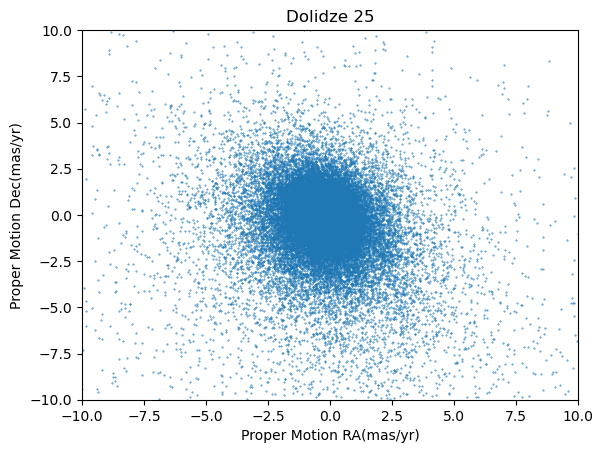

In [7]:
# Plotting the graph between proper motion in RA and Dec to analyse the motion of the cluster 
fig, ax = plt.subplots()

ax.scatter(df.pmRA,df.pmDE,s=0.15)

ax.set(xlim=(-10,10),ylim=(-10,10))
ax.set_xlabel('Proper Motion RA(mas/yr)')
ax.set_ylabel('Proper Motion Dec(mas/yr)')
ax.set_title('Dolidze 25')
plt.show()

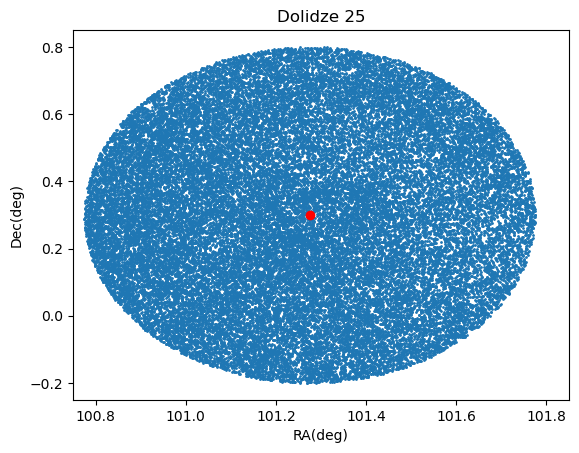

In [8]:
# Plotting RA and Dec of the cluster
fig, ax = plt.subplots()

ax.scatter(df._RAJ2000, df._DEJ2000, s=1)
ax.set(xlim=(100.75,101.85),ylim=(-0.25,0.85))
ax.scatter(101.275, 0.3, color='red', label='center')
ax.set_xlabel('RA(deg)')
ax.set_ylabel('Dec(deg)')
ax.set_title('Dolidze 25')
plt.show()

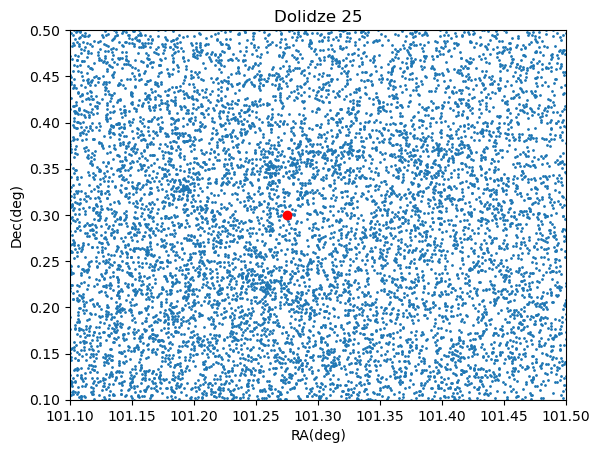

In [9]:
# Same plot as above but with magnified view of the cluster
fig, ax = plt.subplots()

ax.scatter(df._RAJ2000, df._DEJ2000, s=1)
ax.set(xlim=(101.1,101.5),ylim=(0.1,0.5))
ax.scatter(101.275, 0.3, color='red', label='center')
ax.set_xlabel('RA(deg)')
ax.set_ylabel('Dec(deg)')
ax.set_title('Dolidze 25')
plt.show()

# DF filtered with distance

In [10]:
center = astropy.coordinates.get_icrs_coordinates('Dolidze 25')
print(center)

<SkyCoord (ICRS): (ra, dec) in deg
    (101.275, 0.3)>


In [11]:
# Function to calculate the distance of each star from cluster center acquired from sesame Name resolver-CDS 
def angular_dist(ra_star,dec_star):
    ra_c = 101.275
    dec_c = 0.3

    a = (np.sin((np.abs(np.radians(dec_c) - np.radians(dec_star)))/2)) ** 2
    b = np.cos(np.radians(dec_c)) * np.cos(np.radians(dec_star)) *(np.sin((np.abs(np.radians(ra_c) - np.radians(ra_star)))/2)) ** 2
  
    # distance
    d = 2 * np.arcsin(np.sqrt(a + b))
  
    return np.degrees(d)

In [12]:
# Creating a column named dist_center containing distance of star from cluster center
df['dist_center'] = df.apply(lambda row : angular_dist(row['RAJ2000'],row['DEJ2000']),axis=1)

We take radius as 5.4 arcminutes

In [13]:
# Definig a new dataframe consisting of only cluster members. This is done with use of cluster radius(5.40 arcmins). 
df_mem_dist = df[df['dist_center'] <= 9/60]
len(df_mem_dist)

4393

In [14]:
df_mem_dist.head()

,_r,_p,_x,_y,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,...,e_RV,Teff,logg,[Fe/H],Dist,AG,E(BP-RP),RAJ2000,DEJ2000,dist_center
0,0.1449,245.2,-0.1316,-0.0607,101.272809,0.298983,101.272807,0.298989,3.125513e+18,0.2034,...,,3888.6,5.0542,-1.6437,560.261,0.0186,0.0100,101.272809,0.298983,0.002415
1,0.1718,172.3,0.0232,-0.1702,101.275383,0.297168,101.275386,0.297163,3.125513e+18,0.2051,...,,3523.5,4.5624,-1.5899,509.8664,0.0303,0.0165,101.275383,0.297168,0.002857
2,0.1743,184.8,-0.0145,-0.1737,101.274758,0.297104,101.274759,0.297106,3.125513e+18,0.2149,...,,,,NaN,,NaN,NaN,101.274758,0.297104,0.002906
3,0.2200,73.6,0.2111,0.0622,101.278518,0.301044,101.278518,0.301036,3.125513e+18,0.0614,...,,5553.7,4.7198,-1.6536,1060.8922,0.8001,0.4396,101.278518,0.301044,0.003669
4,0.2566,180.1,-0.0006,-0.2566,101.274993,0.295713,101.274990,0.295723,3.125513e+18,0.0860,...,,5171.9,4.7712,-2.4446,1003.4904,0.8756,0.4835,101.274993,0.295713,0.004287


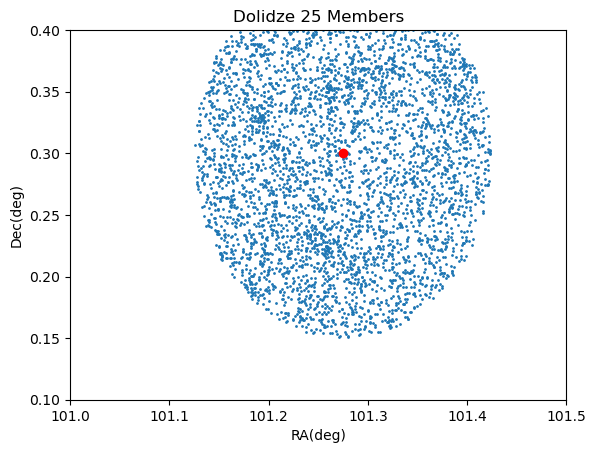

In [15]:
## Plotting RA and Dec of the cluster members
fig, ax = plt.subplots()

ax.scatter(df_mem_dist.RAJ2000, df_mem_dist.DEJ2000, s=1)
ax.set(xlim=(101.0,101.5),ylim=(0.1,0.4))
ax.scatter(101.275, 0.3, color='red', label='center') # center of the cluster
ax.set_xlabel('RA(deg)')
ax.set_ylabel('Dec(deg)')
ax.set_title('Dolidze 25 Members')
plt.show()

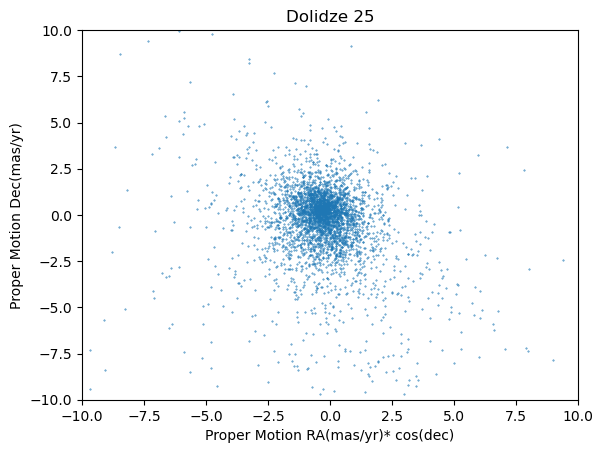

In [16]:
# Plotting the graph between proper motion in RA and Dec to analyse the motion of the cluster 
fig, ax = plt.subplots()

ax.scatter(df_mem_dist.pmRA*np.cos(df_mem_dist['_DEJ2000']),df_mem_dist.pmDE,s=0.15)

ax.set(xlim=(-10,10),ylim=(-10,10))
ax.set_xlabel('Proper Motion RA(mas/yr)* cos(dec)')
ax.set_ylabel('Proper Motion Dec(mas/yr)')
ax.set_title('Dolidze 25')
plt.show()

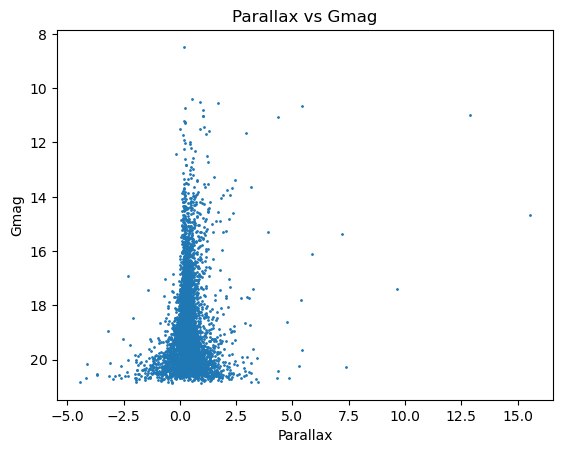

In [17]:
# The parallax vs Gmag graph helps us filter out more non-members of the star cluster (???)
fig, ax = plt.subplots()

ax.scatter(df_mem_dist['Plx'],df_mem_dist['Gmag'],s=1)
ax.set_xlabel('Parallax')
ax.set_ylabel('Gmag')
ax.set_title('Parallax vs Gmag')
plt.gca().invert_yaxis()

# Filtered with E_Gmag,e_pmRA,e_pmDE,Plx/e_plx

In [18]:
df_nerrcorrect = df_mem_dist.copy(deep=True)

In [19]:
df_nerrcorrect['Plx/e_Plx'] = df_nerrcorrect['Plx'] / df_nerrcorrect['e_Plx']

In [20]:
df_G = df_nerrcorrect[
    (df_nerrcorrect['e_Gmag'] < 0.1) &
    (df_nerrcorrect['e_BPmag'] < 0.1) &
    (df_nerrcorrect['e_RPmag'] < 0.1) &
    (df_nerrcorrect['e_pmRA'] < 0.5) &
    (df_nerrcorrect['e_pmDE'] < 0.5)
]



Plx/plx_error > 5 & e(pmRA&pmDE)<0.5

In [21]:
len(df_G)

2222

# df made by considering errors in pmRA and pmDE

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00, 2.100e+01, 2.168e+03, 2.200e+01, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-111.693  ,  -99.99945,  -88.3059 ,  -76.61235,  -64.9188 ,
         -53.22525,  -41.5317 ,  -29.83815,  -18.1446 ,   -6.45105,
           5.2425 ,   16.93605,   28.6296 ,   40.32315,   52.0167 ,
          63.71025,   75.4038 ,   87.09735,   98.7909 ,  110.48445,
         122.178  ]),
 <BarContainer object of 20 artists>)

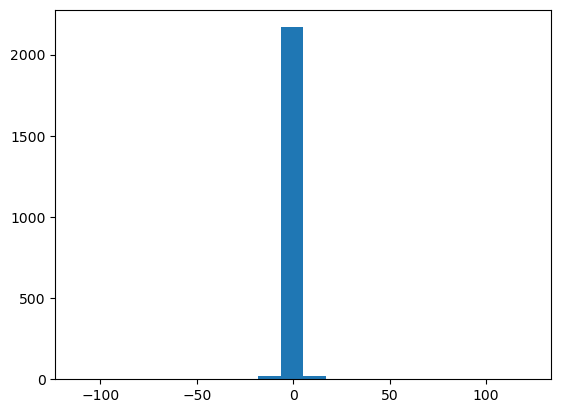

In [22]:
# Creating histogram for pmra

fig, ax = plt.subplots()
ax.hist(df_G.pmRA, bins=20)

In [23]:
Mean_pmRA = df_G['pmRA'].mean()
Std_pmRA = df_G['pmRA'].std()
print(Mean_pmRA)
print(Std_pmRA)

-0.33156866276452046
4.2948268149741695


In [24]:
Mean_pmDE = df_G['pmDE'].mean()
Std_pmDE = df_G['pmDE'].std()
print(Mean_pmDE)
print(Std_pmDE)

-0.7707974797479749
5.723847430440778


In [25]:
lower_bound_pmRA = Mean_pmRA - 3 * Std_pmRA
upper_bound_pmRA = Mean_pmRA + 3 * Std_pmRA
lower_bound_pmDE = Mean_pmDE - 3 * Std_pmDE
upper_bound_pmDE = Mean_pmDE + 3 * Std_pmDE

In [26]:
df_srade = df_G[
    (lower_bound_pmRA < df_G['pmRA']) &
    (df_G['pmRA'] < upper_bound_pmRA) &
    (lower_bound_pmDE < df_G['pmDE']) &
    (df_G['pmDE'] < upper_bound_pmDE)
] # dataframe with approx same ra and dec

Text(0, 0.5, 'Plx')

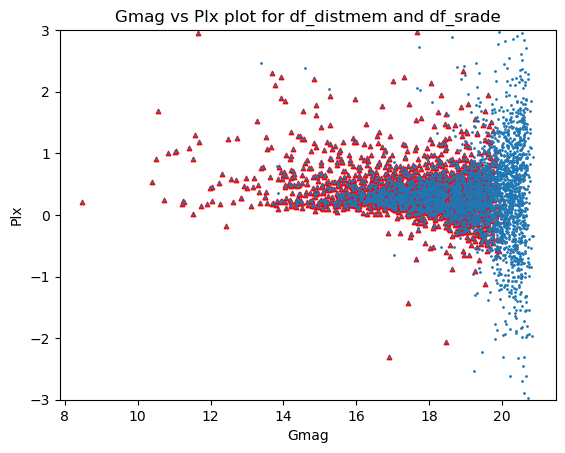

In [27]:
# Plot between initial dataframe and sPlx dataframe
plt.scatter(df_srade['Gmag'],df_srade['Plx'],s=10,marker='^',c='red')
plt.scatter(df_mem_dist['Gmag'],df_mem_dist['Plx'],s=1)
plt.title('Gmag vs Plx plot for df_distmem and df_srade')
plt.xlabel('Gmag')
plt.ylim(-3,3)
plt.ylabel('Plx')

In [28]:
len(df_srade)

2197

Text(0, 0.5, 'G_mag')

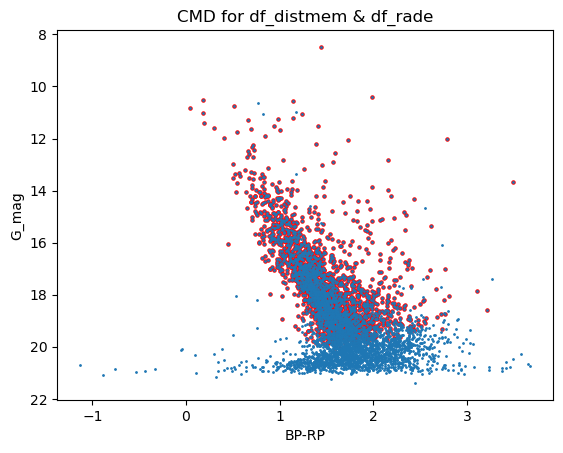

In [29]:
# Color Magnitude diagram of the star cluster(??)
plt.scatter(df_srade['BP-RP'],df_srade['Gmag'],s=5.0,c='red')
plt.scatter(df_mem_dist['BP-RP'],df_mem_dist['Gmag'],s=1.0)
plt.gca().invert_yaxis()
plt.title('CMD for df_distmem & df_rade')
plt.xlabel('BP-RP')
plt.ylabel('G_mag')

# df made by considering errors in Plx

In [30]:
Mean_Plx = df_srade['Plx'].mean()
Std_Plx = df_srade['Plx'].std()
print(Mean_Plx)
print(Std_Plx)

0.3698437414656349
0.44295756036585104


In [31]:
lower_bound_Plx = Mean_Plx - 1 * Std_Plx
upper_bound_Plx = Mean_Plx + 1 * Std_Plx

In [32]:
df_sPlx = df_srade[
    (lower_bound_Plx < df_srade['Plx']) &
    (df_srade['Plx'] < upper_bound_Plx)
] # dataframe with same parallax 

In [33]:
len(df_sPlx)

1852

(array([2.000e+00, 1.000e+00, 2.000e+00, 2.800e+01, 2.600e+02, 1.421e+03,
        3.650e+02, 8.100e+01, 2.200e+01, 8.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-2.3135  , -1.838145, -1.36279 , -0.887435, -0.41208 ,  0.063275,
         0.53863 ,  1.013985,  1.48934 ,  1.964695,  2.44005 ,  2.915405,
         3.39076 ,  3.866115,  4.34147 ,  4.816825,  5.29218 ,  5.767535,
         6.24289 ,  6.718245,  7.1936  ]),
 <BarContainer object of 20 artists>)

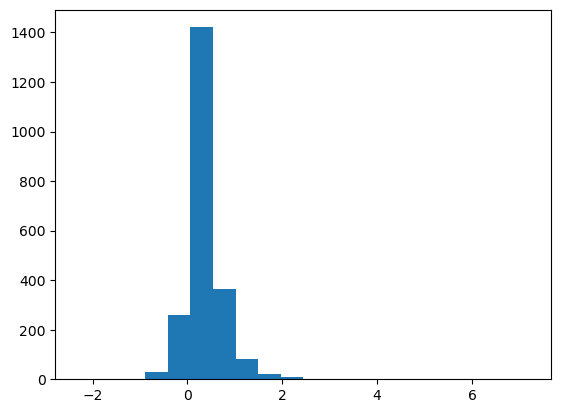

In [34]:
fig, ax = plt.subplots()
ax.hist(df_srade.Plx, bins=20)

The df 'df_sPlx' now contains all the kinematic members of the star cluster.

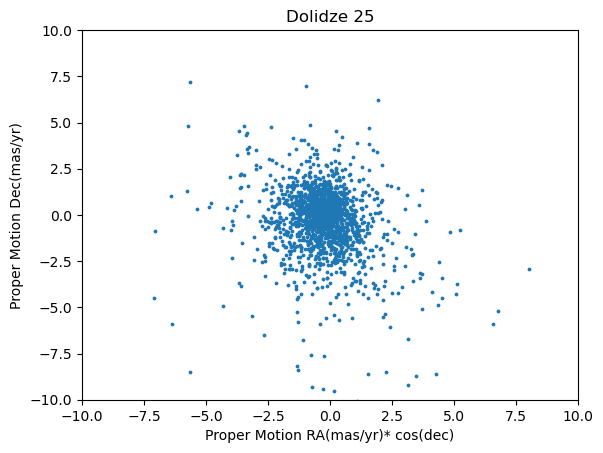

In [35]:
# Plotting the graph between proper motion in RA and Dec to analyse the motion of the cluster 
fig, ax = plt.subplots()

ax.scatter(df_sPlx.pmRA*np.cos(df_sPlx['_DEJ2000']),df_sPlx.pmDE,s=3)

ax.set(xlim=(-10,10),ylim=(-10,10))
ax.set_xlabel('Proper Motion RA(mas/yr)* cos(dec)')
ax.set_ylabel('Proper Motion Dec(mas/yr)')
ax.set_title('Dolidze 25')
plt.show()

(-0.5, 1.0)

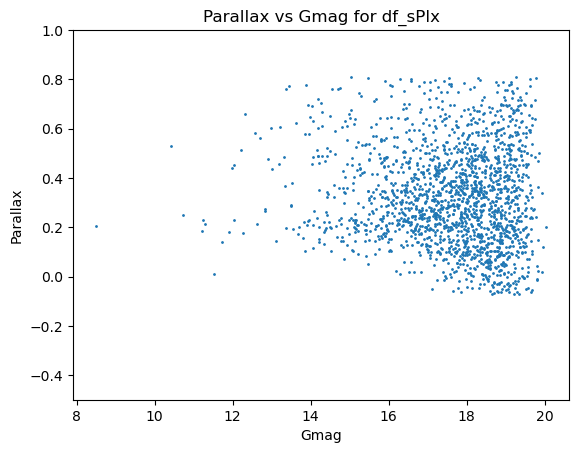

In [36]:
# The parallax vs Gmag graph helps us filter out more non-members of the star cluster (???)
fig, ax = plt.subplots()

ax.scatter(df_sPlx['Gmag'],df_sPlx['Plx'],s=1)
ax.set_xlabel('Gmag')
ax.set_ylabel('Parallax')
ax.set_title('Parallax vs Gmag for df_sPlx')
plt.ylim(-0.5,1)

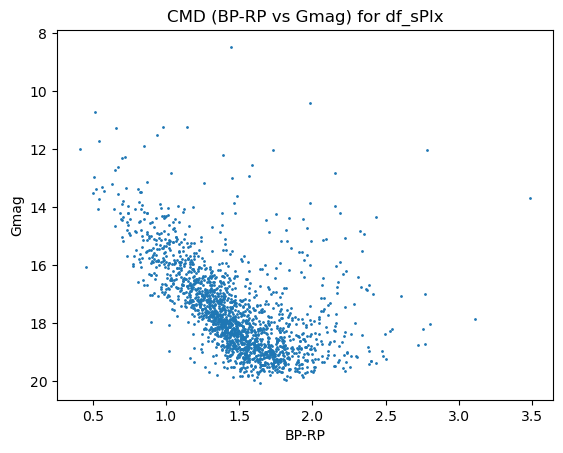

In [37]:
# Color Magnitude diagram of the star cluster(??)
fig, ax = plt.subplots()

ax.scatter(df_sPlx['BP-RP'],df_sPlx['Gmag'],s=1.0)
ax.set_xlabel('BP-RP')
ax.set_ylabel('Gmag')
ax.set_title('CMD (BP-RP vs Gmag) for df_sPlx')
plt.gca().invert_yaxis()

Text(0, 0.5, 'Plx')

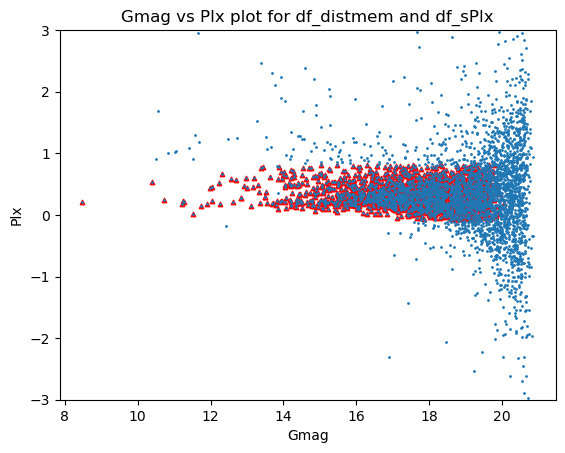

In [38]:
# Plot between initial dataframe and sPlx dataframe
plt.scatter(df_sPlx['Gmag'],df_sPlx['Plx'],s=10,marker='^',c='red')
plt.scatter(df_mem_dist['Gmag'],df_mem_dist['Plx'],s=1)
plt.title('Gmag vs Plx plot for df_distmem and df_sPlx')
plt.xlabel('Gmag')
plt.ylim(-3,3)
plt.ylabel('Plx')

# Dataframe for CMD

In [39]:
df_cmd = df_sPlx.copy(deep=True)

In [40]:
df_cmd['BPmag-RPmag'] = df_cmd['BPmag']-df_cmd['RPmag']

In [41]:
df_cmd['cPlx'] = df_cmd['Plx'] - 0.015

In [42]:
def absmag(app_mag,dist_parsecs,extinction):
    return (app_mag - 5*np.log10(dist_parsecs) + 5 - extinction)

In [43]:
df_cmd['dist_parsecs'] = 1000/df_cmd['cPlx']

In [44]:
print(df_cmd['AG'].mean())

0.6957337053571429


In [45]:
print(df_cmd['E(BP-RP)'].mean())

0.37988169642857145


In [46]:
df_cmd['M_Gmag'] = df_cmd.apply(lambda row : absmag(row['Gmag'], row['dist_parsecs'], 0.88),axis=1)

/tmp/ipykernel_24084/863766239.py:2: RuntimeWarning: invalid value encountered in log10
  return (app_mag - 5*np.log10(dist_parsecs) + 5 - extinction)


In [47]:
df_cmd['M_Gmag_theory'] = df_cmd.apply(lambda row : absmag(row['Gmag'], 2666,0.88),axis=1)

In [48]:
df_cmd['M_BPmag-RPmag'] = df_cmd.apply(lambda row : absmag(row['BPmag-RPmag'], row['dist_parsecs'],3.1*row['E(BP-RP)']),axis=1)

/tmp/ipykernel_24084/863766239.py:2: RuntimeWarning: invalid value encountered in log10
  return (app_mag - 5*np.log10(dist_parsecs) + 5 - extinction)


In [49]:
df_cmd['M_BPmag-RPmag_theory'] = df_cmd.apply(lambda row : absmag(row['BPmag-RPmag'], 2666,3.1*0.90),axis=1)

In [50]:
df_cmd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852 entries, 0 to 4392
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _r                    1852 non-null   float64
 1   _p                    1851 non-null   float64
 2   _x                    1852 non-null   float64
 3   _y                    1852 non-null   float64
 4   _RAJ2000              1852 non-null   float64
 5   _DEJ2000              1852 non-null   float64
 6   RA_ICRS               1852 non-null   float64
 7   DE_ICRS               1852 non-null   float64
 8   Source                1852 non-null   float64
 9   e_RA_ICRS             1852 non-null   float64
 10  e_DE_ICRS             1852 non-null   float64
 11  Plx                   1852 non-null   float64
 12  e_Plx                 1852 non-null   float64
 13  PM                    1852 non-null   object 
 14  pmRA                  1852 non-null   float64
 15  e_pmRA               

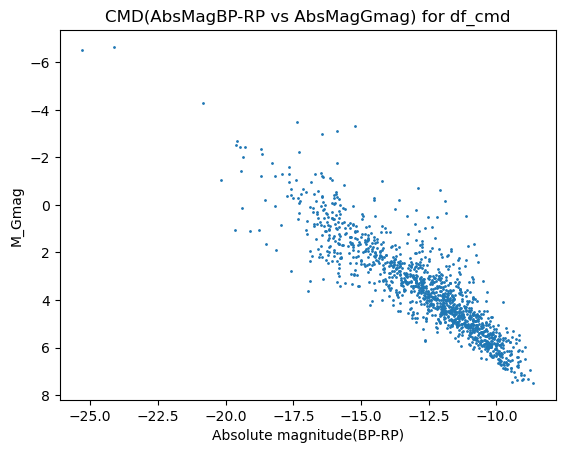

In [51]:
# Color Magnitude diagram of the star cluster(??)
fig, ax = plt.subplots()

ax.scatter(df_cmd['M_BPmag-RPmag'],df_cmd['M_Gmag'],s=1.0)
ax.set_xlabel('Absolute magnitude(BP-RP)')
ax.set_ylabel('M_Gmag')
ax.set_title('CMD(AbsMag''BP-RP'' vs AbsMag''Gmag'') for df_cmd')
plt.gca().invert_yaxis()

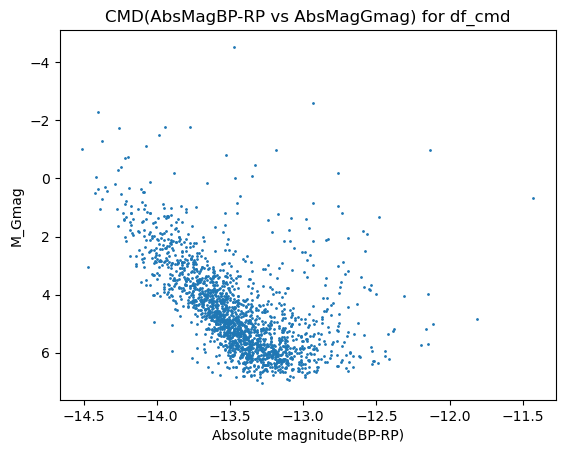

In [52]:
# Color Magnitude diagram of the star cluster(??)
fig, ax = plt.subplots()

ax.scatter(df_cmd['M_BPmag-RPmag_theory'],df_cmd['M_Gmag_theory'],s=1.0)
ax.set_xlabel('Absolute magnitude(BP-RP)')
ax.set_ylabel('M_Gmag')
ax.set_title('CMD(AbsMag''BP-RP'' vs AbsMag''Gmag'') for df_cmd')
plt.gca().invert_yaxis()

Text(0, 0.5, 'G_mag')

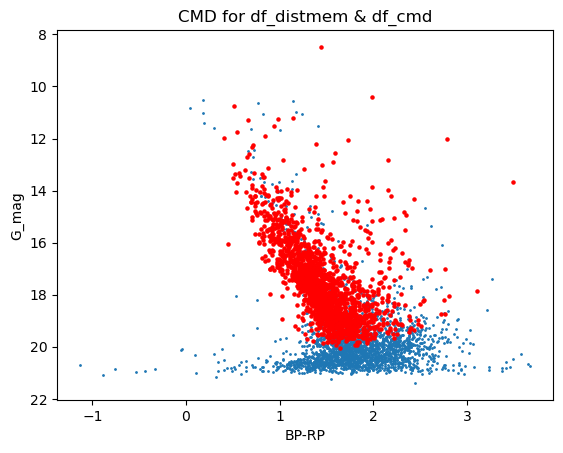

In [134]:
# Color Magnitude diagram of the star cluster(??)
plt.scatter(df_mem_dist['BP-RP'],df_mem_dist['Gmag'],s=1.0)
plt.scatter(df_sPlx['BP-RP'],df_sPlx['Gmag'],s=5.0,c='red')
plt.gca().invert_yaxis()
plt.title('CMD for df_distmem & df_cmd')
plt.xlabel('BP-RP')
plt.ylabel('G_mag')

# Isochrone Fitting (CMD input form logage= 7.0 to 8.0yr)

## Logage = 6.5 yr

In [54]:
isochrones_65_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.5.txt',skiprows=1)

In [55]:
isochrones_65 = pd.DataFrame(data=isochrones_65_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [56]:
isochrones_65['BP-RP'] = isochrones_65['G_BPmag']-isochrones_65['G_RPmag']

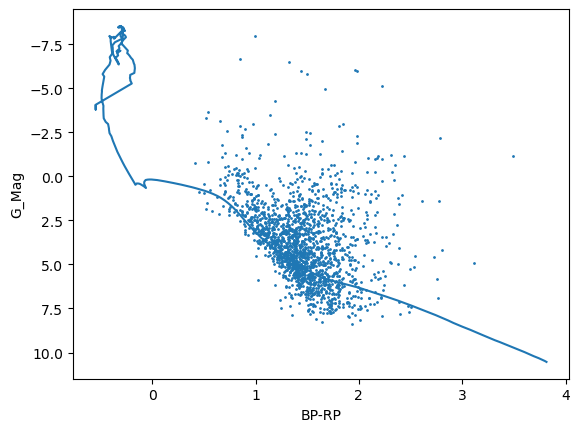

In [57]:
plt.plot(isochrones_65['BP-RP'],isochrones_65['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

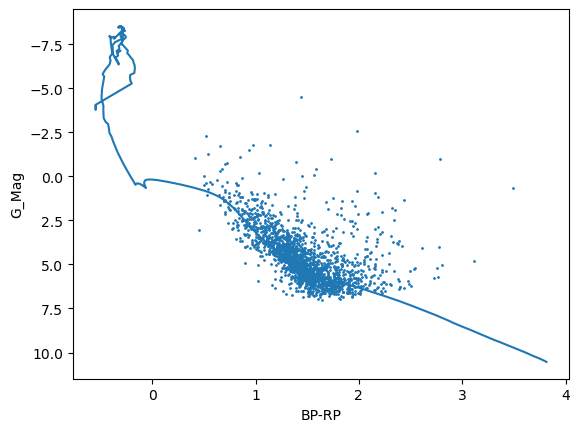

In [58]:
plt.plot(isochrones_65['BP-RP'],isochrones_65['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 6.6 yr

In [59]:
isochrones_66_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.6.txt',skiprows=1)

In [60]:
isochrones_66 = pd.DataFrame(data=isochrones_66_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [61]:
isochrones_66['BP-RP'] = isochrones_66['G_BPmag']-isochrones_66['G_RPmag']

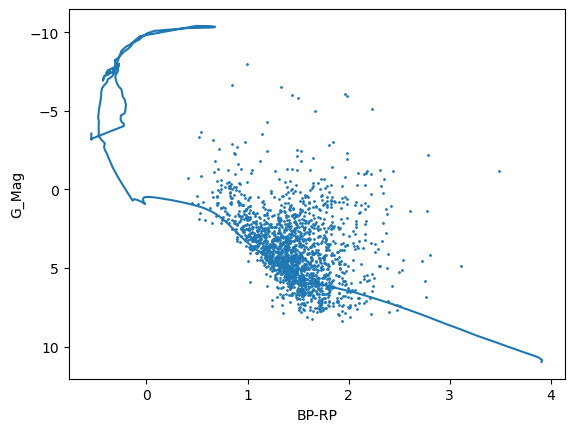

In [62]:
plt.plot(isochrones_66['BP-RP'],isochrones_66['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

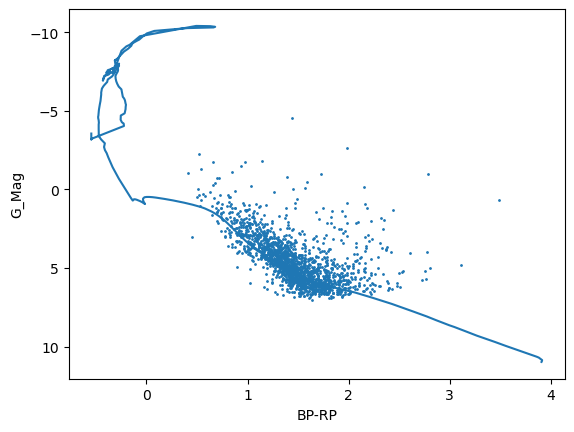

In [63]:
plt.plot(isochrones_66['BP-RP'],isochrones_66['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 6.7 yr

In [64]:
isochrones_67_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.7.txt',skiprows=1)

In [65]:
isochrones_67 = pd.DataFrame(data=isochrones_67_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [66]:
isochrones_67['BP-RP'] = isochrones_67['G_BPmag']-isochrones_67['G_RPmag']

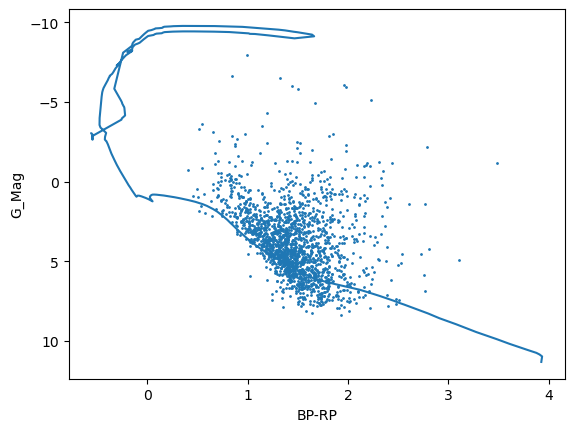

In [67]:
plt.plot(isochrones_67['BP-RP'],isochrones_67['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

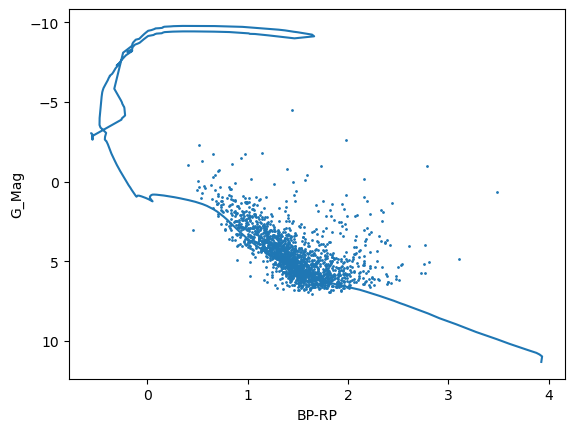

In [68]:
plt.plot(isochrones_67['BP-RP'],isochrones_67['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 6.8 yr

In [69]:
isochrones_68_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.8.txt',skiprows=1)

In [70]:
isochrones_68 = pd.DataFrame(data=isochrones_68_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [71]:
isochrones_68['BP-RP'] = isochrones_68['G_BPmag']-isochrones_68['G_RPmag']

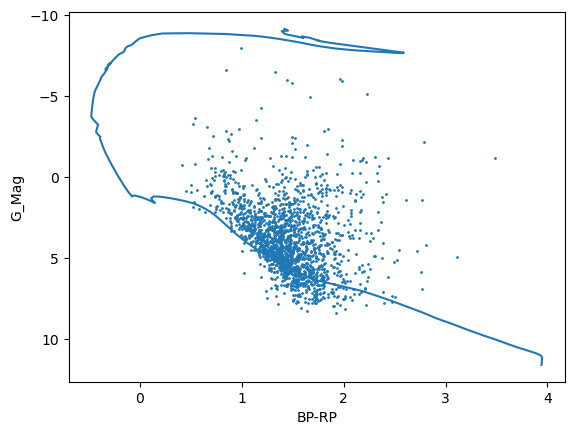

In [72]:
plt.plot(isochrones_68['BP-RP'],isochrones_68['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

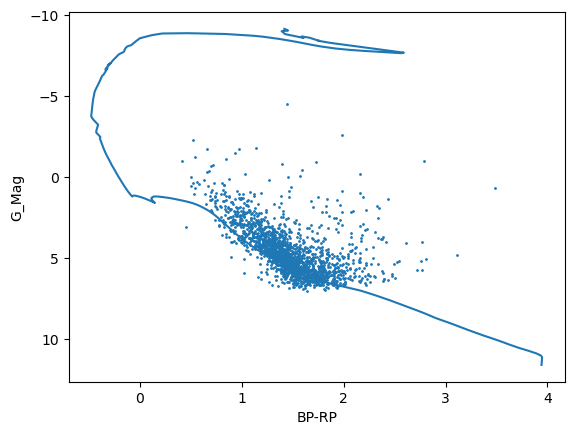

In [73]:
plt.plot(isochrones_68['BP-RP'],isochrones_68['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 6.9 yr

In [74]:
isochrones_69_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.9.txt',skiprows=1)

In [75]:
isochrones_69 = pd.DataFrame(data=isochrones_69_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [76]:
isochrones_69['BP-RP'] = isochrones_69['G_BPmag']-isochrones_69['G_RPmag']

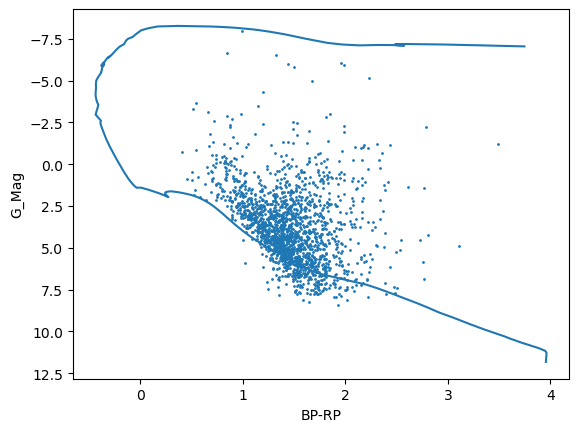

In [77]:
plt.plot(isochrones_69['BP-RP'],isochrones_69['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

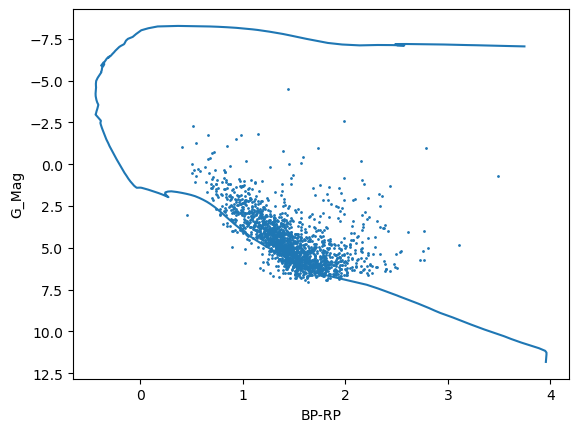

In [78]:
plt.plot(isochrones_69['BP-RP'],isochrones_69['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.0 yr

In [79]:
isochrones_70_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.0.txt',skiprows=1)

In [80]:
isochrones_70 = pd.DataFrame(data=isochrones_70_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [81]:
isochrones_70['BP-RP'] = isochrones_70['G_BPmag']-isochrones_70['G_RPmag']

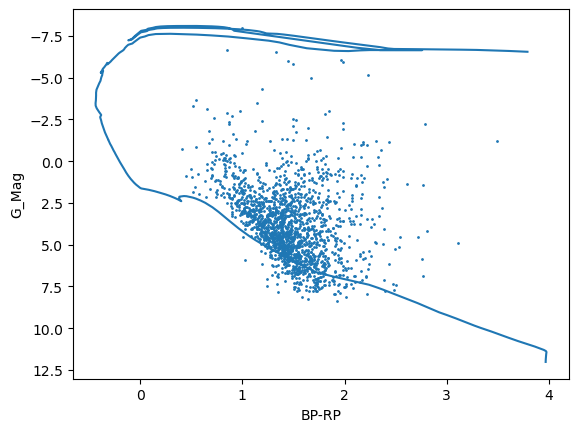

In [82]:
plt.plot(isochrones_70['BP-RP'],isochrones_70['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

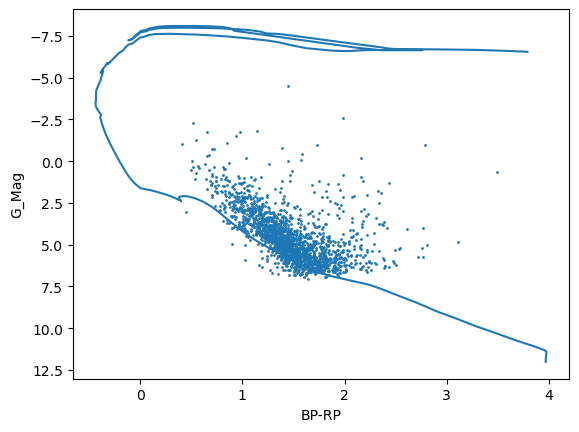

In [83]:
plt.plot(isochrones_70['BP-RP'],isochrones_70['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.1 yr

In [84]:
isochrones_71_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.1.txt',skiprows=1)

In [85]:
isochrones_71 = pd.DataFrame(data=isochrones_71_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [86]:
isochrones_71['BP-RP'] = isochrones_71['G_BPmag']-isochrones_71['G_RPmag']

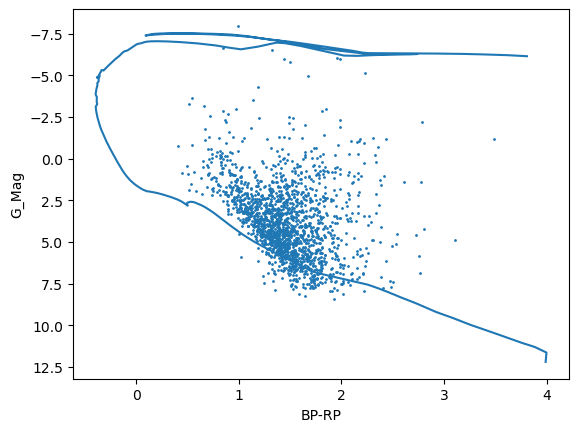

In [87]:
plt.plot(isochrones_71['BP-RP'],isochrones_71['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

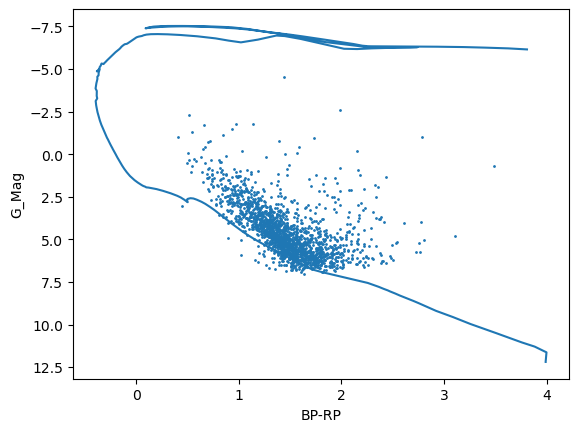

In [88]:
plt.plot(isochrones_71['BP-RP'],isochrones_71['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.2 yr

In [89]:
isochrones_72_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.2.txt',skiprows=1)

In [90]:
isochrones_72 = pd.DataFrame(data=isochrones_72_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [91]:
isochrones_72['BP-RP'] = isochrones_72['G_BPmag']-isochrones_72['G_RPmag']

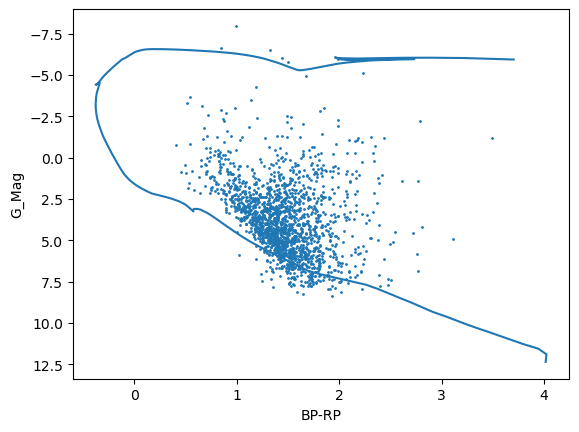

In [92]:
plt.plot(isochrones_72['BP-RP'],isochrones_72['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

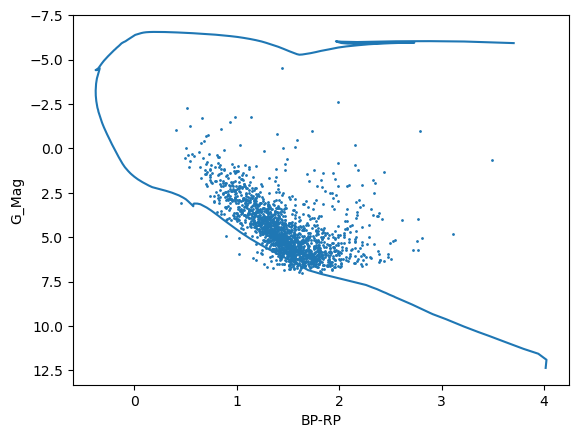

In [93]:
plt.plot(isochrones_72['BP-RP'],isochrones_72['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.3 yr

In [94]:
isochrones_73_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.3.txt',skiprows=1)

In [95]:
isochrones_73 = pd.DataFrame(data=isochrones_73_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [96]:
isochrones_73['BP-RP'] = isochrones_73['G_BPmag']-isochrones_73['G_RPmag']

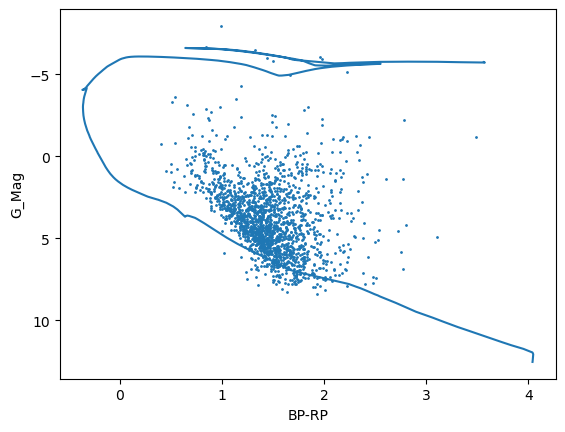

In [97]:
plt.plot(isochrones_73['BP-RP'],isochrones_73['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

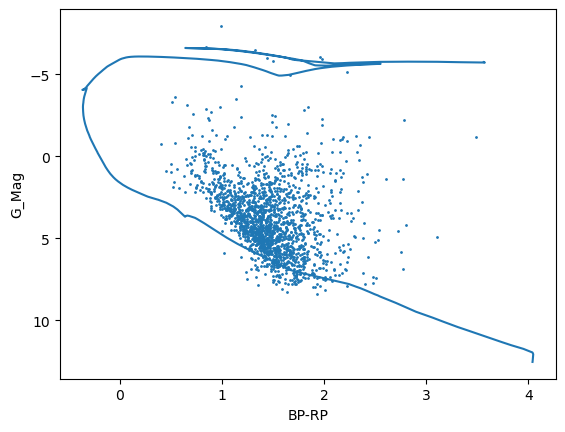

In [98]:
plt.plot(isochrones_73['BP-RP'],isochrones_73['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.4 yr

In [99]:
isochrones_74_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.4.txt',skiprows=1)

In [100]:
isochrones_74 = pd.DataFrame(data=isochrones_74_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [101]:
isochrones_74['BP-RP'] = isochrones_74['G_BPmag']-isochrones_74['G_RPmag']

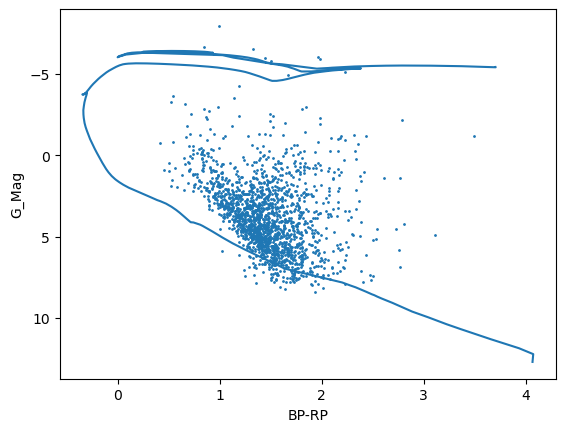

In [102]:
plt.plot(isochrones_74['BP-RP'],isochrones_74['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

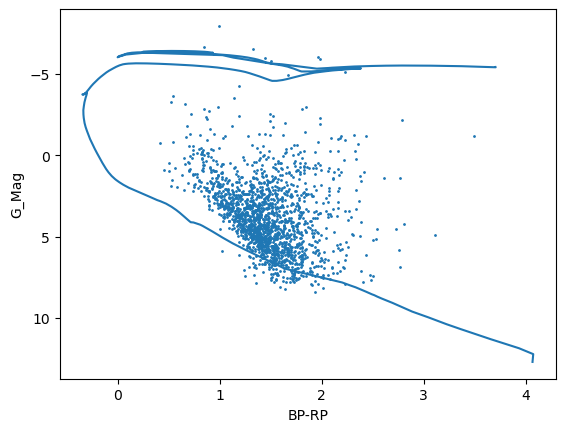

In [103]:
plt.plot(isochrones_74['BP-RP'],isochrones_74['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.5 yr

In [104]:
isochrones_75_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.5.txt',skiprows=1)

In [105]:
isochrones_75 = pd.DataFrame(data=isochrones_75_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [106]:
isochrones_75['BP-RP'] = isochrones_75['G_BPmag']-isochrones_75['G_RPmag']

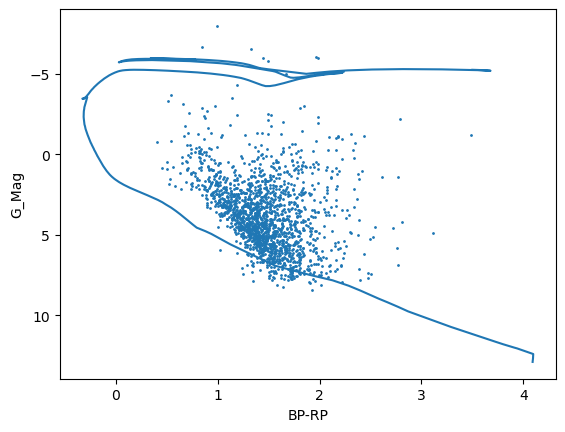

In [107]:
plt.plot(isochrones_75['BP-RP'],isochrones_75['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

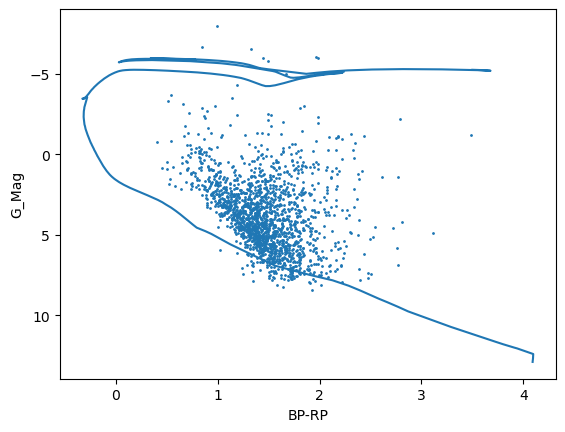

In [108]:
plt.plot(isochrones_75['BP-RP'],isochrones_75['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.6 yr

In [109]:
isochrones_76_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.6.txt',skiprows=1)

In [110]:
isochrones_76 = pd.DataFrame(data=isochrones_76_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [111]:
isochrones_76['BP-RP'] = isochrones_76['G_BPmag']-isochrones_76['G_RPmag']

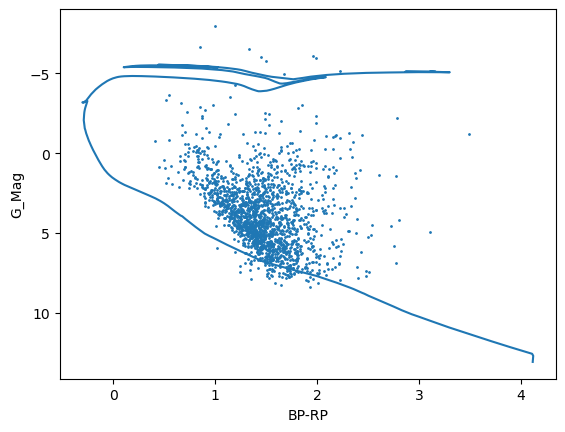

In [112]:
plt.plot(isochrones_76['BP-RP'],isochrones_76['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

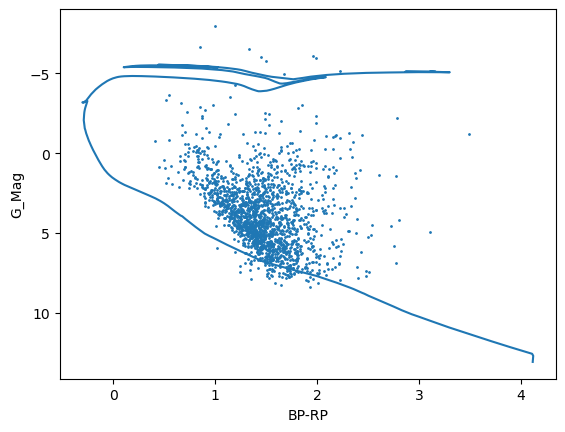

In [113]:
plt.plot(isochrones_76['BP-RP'],isochrones_76['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.7 yr

In [114]:
isochrones_77_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.7.txt',skiprows=1)

In [115]:
isochrones_77 = pd.DataFrame(data=isochrones_77_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [116]:
isochrones_77['BP-RP'] = isochrones_77['G_BPmag']-isochrones_77['G_RPmag']

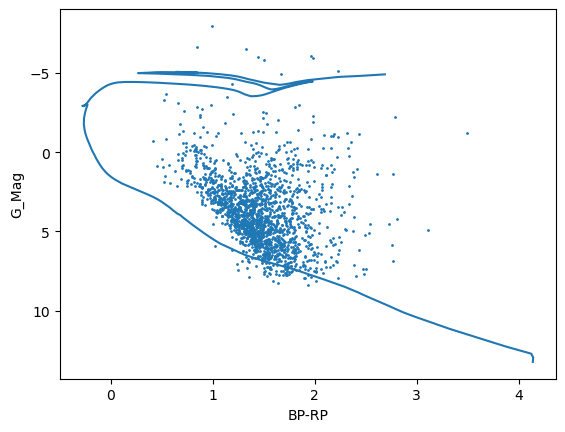

In [117]:
plt.plot(isochrones_77['BP-RP'],isochrones_77['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

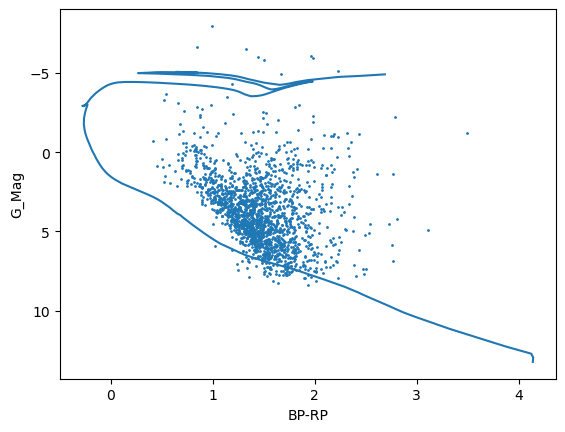

In [118]:
plt.plot(isochrones_77['BP-RP'],isochrones_77['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.8 yr

In [119]:
isochrones_78_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.8.txt',skiprows=1)

In [120]:
isochrones_78 = pd.DataFrame(data=isochrones_78_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [121]:
isochrones_78['BP-RP'] = isochrones_78['G_BPmag']-isochrones_78['G_RPmag']

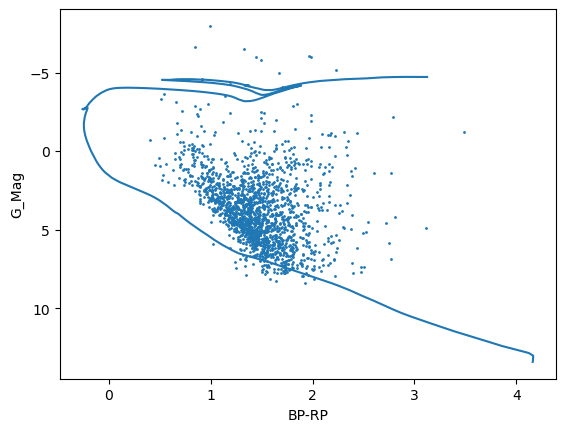

In [122]:
plt.plot(isochrones_78['BP-RP'],isochrones_78['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

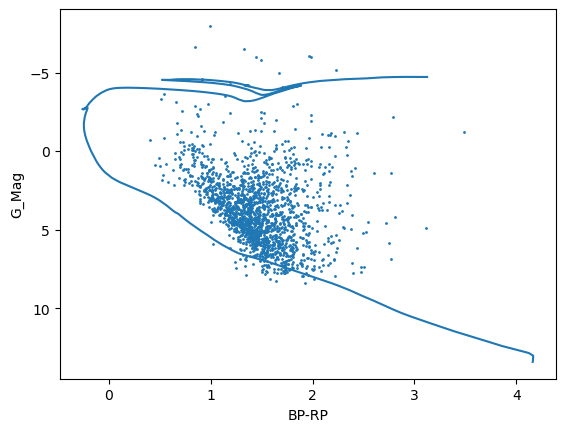

In [123]:
plt.plot(isochrones_78['BP-RP'],isochrones_78['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.9 yr

In [124]:
isochrones_79_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.9.txt',skiprows=1)

In [125]:
isochrones_79 = pd.DataFrame(data=isochrones_79_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [126]:
isochrones_79['BP-RP'] = isochrones_79['G_BPmag']-isochrones_79['G_RPmag']

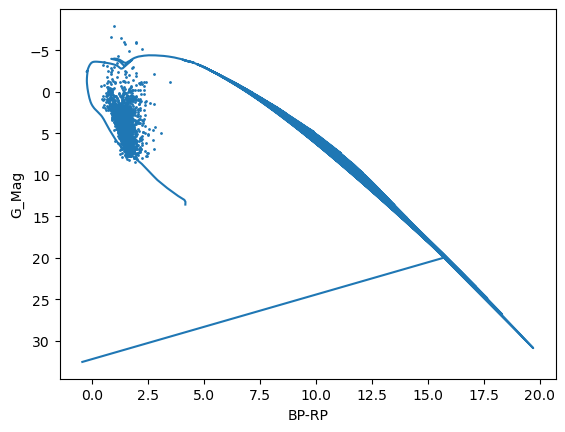

In [127]:
plt.plot(isochrones_79['BP-RP'],isochrones_79['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

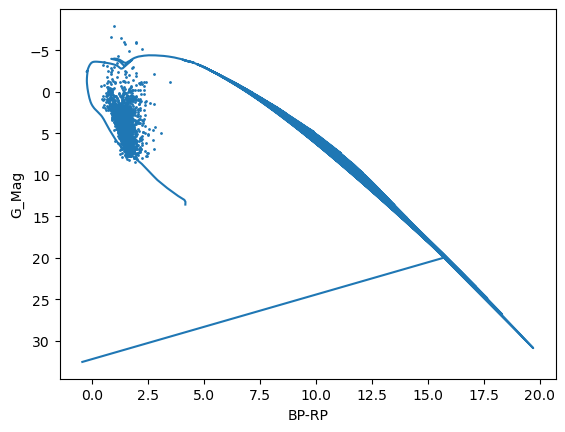

In [128]:
plt.plot(isochrones_79['BP-RP'],isochrones_79['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 8.0 yr

In [129]:
isochrones_80_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/8.0.txt',skiprows=1)

In [130]:
isochrones_80 = pd.DataFrame(data=isochrones_80_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [131]:
isochrones_80['BP-RP'] = isochrones_80['G_BPmag']-isochrones_80['G_RPmag']

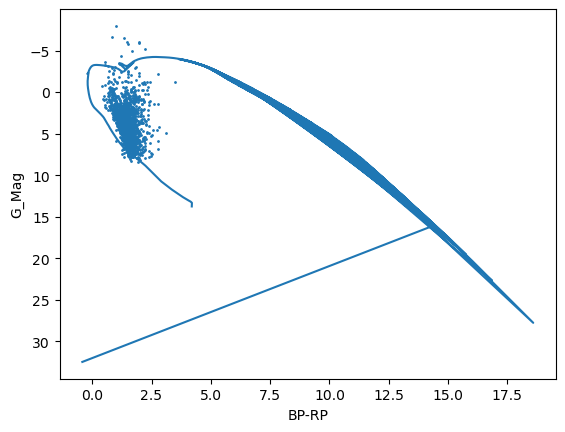

In [132]:
plt.plot(isochrones_80['BP-RP'],isochrones_80['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

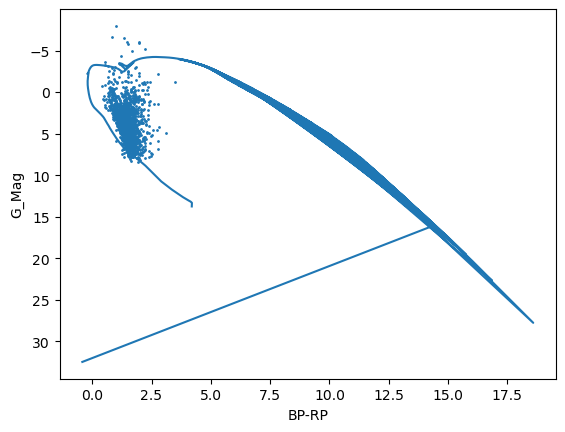

In [133]:
plt.plot(isochrones_80['BP-RP'],isochrones_80['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()